# File Name : SVC.ipynb
# Version : 1.0
# Revision : `$Log$`

# Author 1 : Jagwant Sehgal (js3050@rit.edu)
# Author 2 : Kundan Patil (kp4677@rit.edu)
# Author 3 : Abhilekh Chaudhari (ac4241@rit.edu)

# Date : 03/28/2021

##Import Necessary Libraries

In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import time
import seaborn as sns; sns.set()

## Read data


In [2]:
training_data = pd.read_csv("train.csv")

##Training and Evaluation

In [ ]:
training_data_size = [100,500,1000,5000,10000,15000,20000,25000,30000,41999]

training_accuracy_list = list()
training_error_list = list()
testing_accuracy_list = list()
testing_error_list = list()

start_time = time.time()
for size in training_data_size:
  modified_training_data = training_data.iloc[1:size+1,:]
  
  Y = modified_training_data["label"]
  X = modified_training_data.drop("label",axis=1)
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
  
  svc_model = svm.SVC()
  
  svc_model.fit(X_train, Y_train)
  
  training_accuracy = svc_model.score(X_train, Y_train)
  training_error = 1- training_accuracy
  
  Y_pred = svc_model.predict(X_test)
  
  testing_accuracy = svc_model.score(X_test, Y_test)
  testing_error = 1 - testing_accuracy

  training_accuracy_list.append(training_accuracy)
  training_error_list.append(training_error)
  testing_accuracy_list.append(testing_accuracy)
  testing_error_list.append(testing_error)
  print("Finished for "+str(size)+"\tTotal Time : ", (time.time() - start_time))
  start_time = time.time()
  

## Learning Curve Visualization

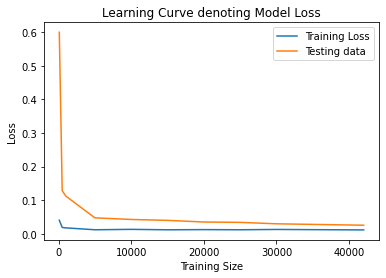

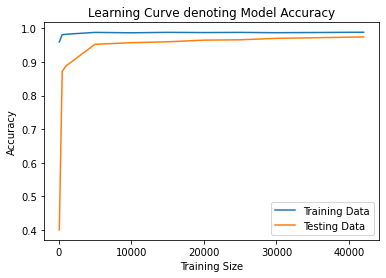

In [6]:
fig = plt.figure()
plt.plot(training_data_size, training_error_list,label="Training Loss")
plt.plot(training_data_size, testing_error_list, label="Testing data")
plt.title("Learning Curve denoting Model Loss")
plt.ylabel("Loss")
plt.xlabel('Training Size')
plt.legend(loc="upper right")
fig.savefig('SVC_Loss.png')
plt.show()

fig = plt.figure()
plt.plot(training_data_size, training_accuracy_list, label="Training Data")
plt.plot(training_data_size, testing_accuracy_list, label="Testing Data")
plt.title("Learning Curve denoting Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel('Training Size')
plt.legend(loc="lower right")
fig.savefig('SVC_Accuracy.png')
plt.show()

## Images where correct class probability is very high or low

In [ ]:
probability_estimate = svc_model.decision_function(X_test)

In [9]:
class_names = [0,1,2,3,4,5,6,7,8,9]
probability_estimate_dataframe = pd.DataFrame(probability_estimate, columns=class_names)

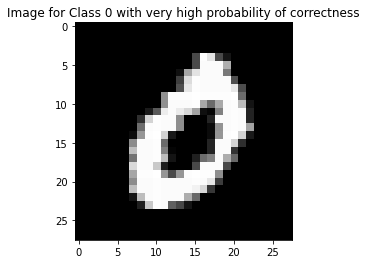

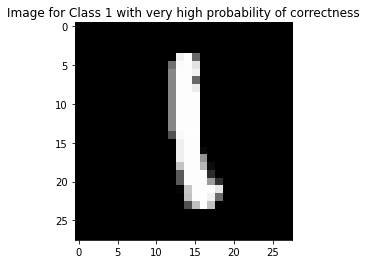

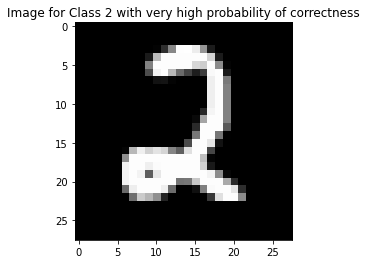

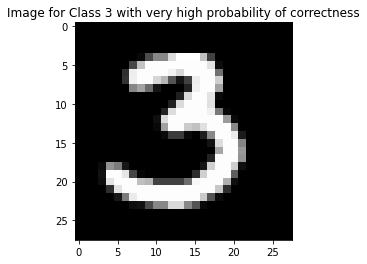

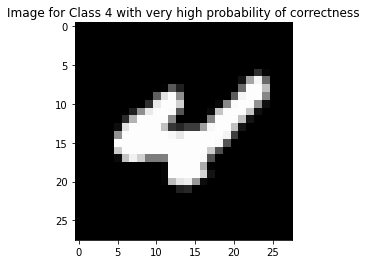

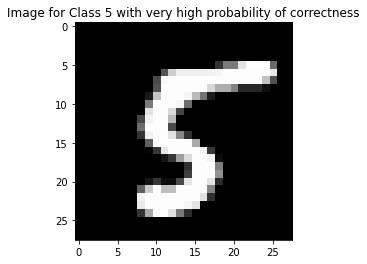

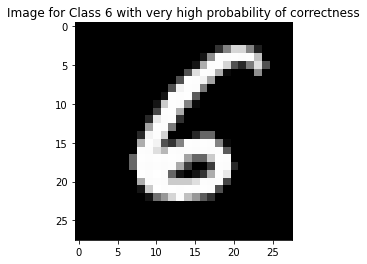

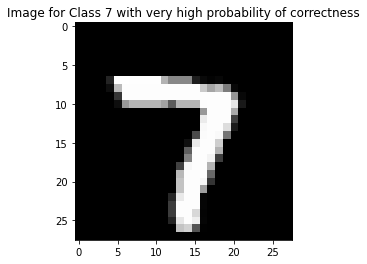

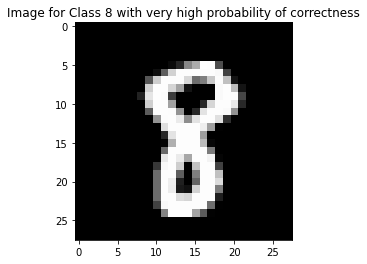

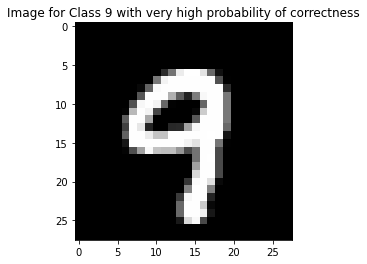

In [10]:
for column in probability_estimate_dataframe.columns:
  column_data = probability_estimate_dataframe[column]
  numpy_column_data = np.array(column_data)
  max_index = np.argmax(numpy_column_data)
  data = X_test.iloc[max_index,:]
  image_data = np.array(data)
  image_data_reshaped = np.reshape(image_data, (28,28))
  plt.title("Image for Class "+str(column)+" with very high probability of correctness")
  plt.imshow(image_data_reshaped, cmap="gray")
  plt.show()

## For each class, image where correct class probability is slightly higher than other

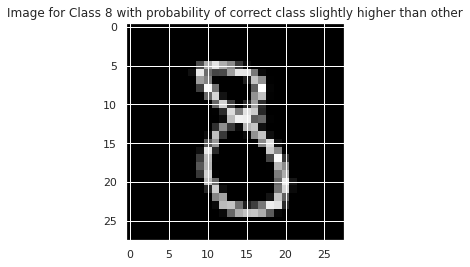

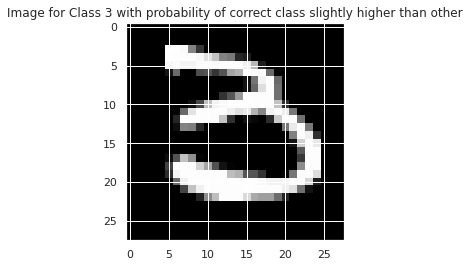

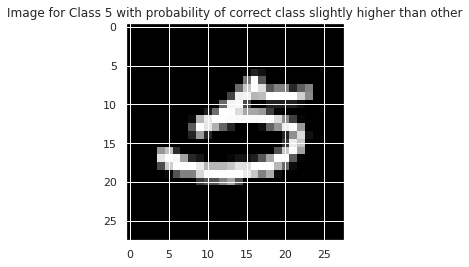

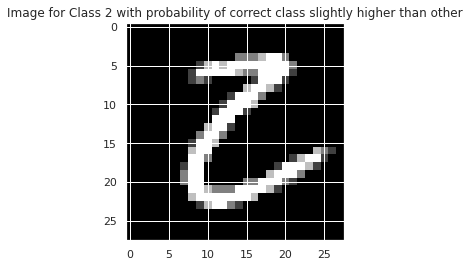

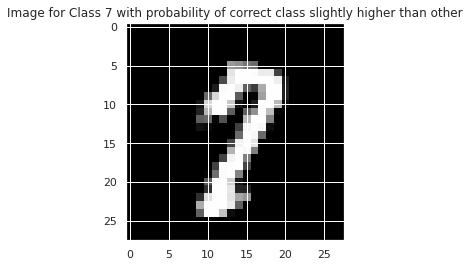

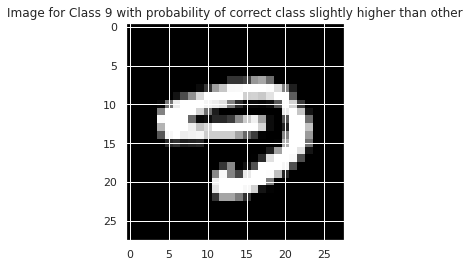

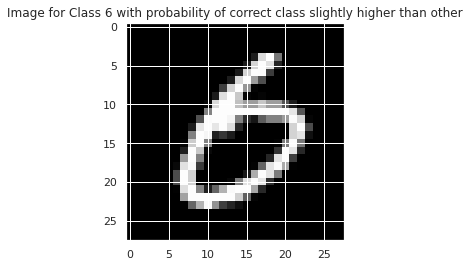

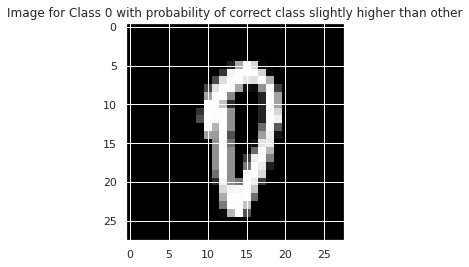

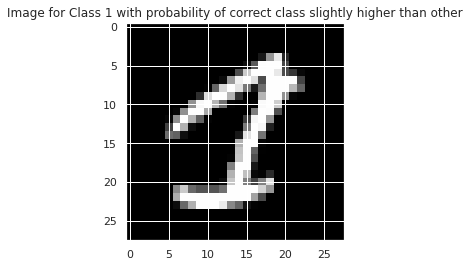

In [15]:
confused_images_index = list()
threshold = 0.15

for index, row in probability_estimate_dataframe.iterrows():
  data = np.array(row)
  data.sort()
  first = data[-1]
  second = data[-2]
  difference = first - second
  if difference < threshold:
    confused_images_index.append(index)

boolean_class = [False,False,False,False,False,False,False,False,False,False]

for index in confused_images_index:
  if boolean_class[Y_test.iloc[index]] == True:
    continue
  else:   
    image_data = np.array(X_test.iloc[index])
    image_data_reshaped = np.reshape(image_data, (28,28))
    plt.title("Image for Class "+str(Y_test.iloc[index])+" with probability of correct class slightly higher than other")
    plt.imshow(image_data_reshaped, cmap="gray")
    plt.show()
    boolean_class[Y_test.iloc[index]] = True

## Plot Confusion Matrix

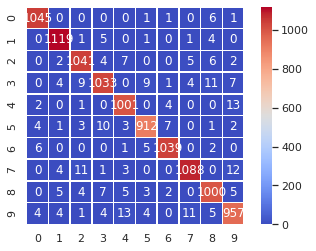

In [14]:
Y_pred = svc_model.predict(X_test)

class_names = ["0","1","2","3","4","5","6","7","8","9"]
confusion_matrix_data = confusion_matrix(Y_test, Y_pred)

sns.heatmap(confusion_matrix_data, square=True,annot=True,fmt="d",linewidths=.5, cbar=True,cmap="coolwarm")